In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [31]:
# Read train, test and the submission dataset
train = pd.read_csv("Train Dataset .csv")
test = pd.read_csv("Test Dataset.csv")


In [4]:
# Rename the columns in the DataFrame
test.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

#concatenating the train and test dataframe to work on the both simultaneuosly
train["targ"] = "train"
test["targ"] = "test"

df = pd.concat([train, test], ignore_index=True)
df.shape

(10000, 16)

In [5]:
train.shape, test.shape  #checking the shape of the train and test data

((7303, 16), (2697, 15))

In [6]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.50,1,4,1,1.00,train
1,11275,53,1,2,198,154,0,1,104,0,0.80,2,1,0,0.00,train
2,13251,37,1,2,101,202,1,0,155,0,2.10,1,3,1,1.00,train
3,19921,75,0,0,113,306,1,2,88,1,4.90,0,2,2,1.00,train
4,11293,35,1,2,139,419,1,1,166,1,0.90,2,4,0,1.00,train


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        10000 non-null  int64  
 1   Age       10000 non-null  int64  
 2   Sex       10000 non-null  int64  
 3   cp        10000 non-null  int64  
 4   trestbps  10000 non-null  int64  
 5   chol      10000 non-null  int64  
 6   fbs       10000 non-null  int64  
 7   restecg   10000 non-null  int64  
 8   thalach   10000 non-null  int64  
 9   exang     10000 non-null  int64  
 10  oldpeak   10000 non-null  float64
 11  slope     10000 non-null  int64  
 12  ca        10000 non-null  int64  
 13  thal      10000 non-null  int64  
 14  target    7303 non-null   float64
 15  targ      10000 non-null  object 
dtypes: float64(2), int64(13), object(1)
memory usage: 1.2+ MB


In [7]:
# descriptive analysis
df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,7303.00
mean,14999.50,53.14,0.50,1.50,147.16,343.14,0.49,1.02,136.37,0.50,3.13,1.00,2.02,1.49,0.81
std,2886.90,14.23,0.50,1.11,30.98,127.28,0.50,0.81,38.22,0.50,1.80,0.82,1.41,1.12,0.39
min,10000.00,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12499.75,41.00,0.00,1.00,120.75,232.00,0.00,0.00,103.00,0.00,1.60,0.00,1.00,1.00,1.00
50%,14999.50,53.00,0.00,1.00,148.00,341.50,0.00,1.00,137.00,0.00,3.10,1.00,2.00,1.00,1.00
75%,17499.25,66.00,1.00,3.00,174.00,452.00,1.00,2.00,170.00,1.00,4.70,2.00,3.00,2.00,1.00
max,19999.00,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
# checking for missiing values
df.isnull().sum()

Id             0
Age            0
Sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target      2697
targ           0
dtype: int64

### Exploratory Data Analysis

### Univariate Analysis

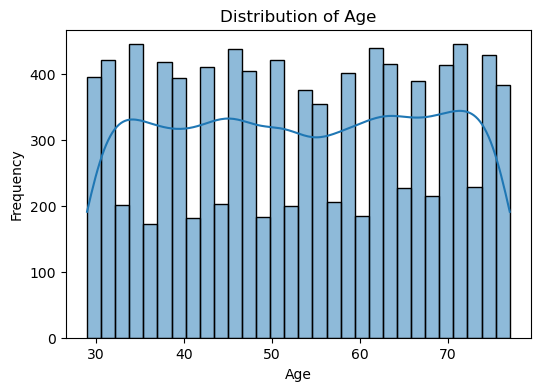

In [9]:
# checking Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

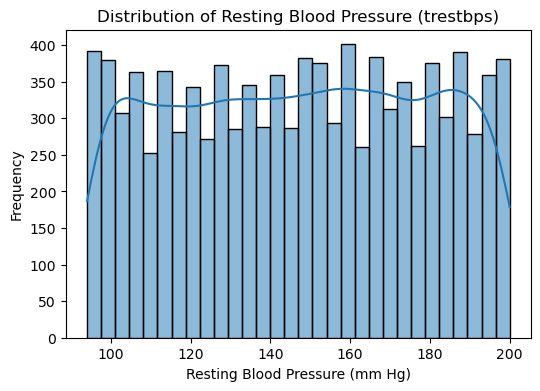

In [10]:
# checking the distribution of Resting Blood Pressure (trestbps)
plt.figure(figsize=(6, 4))
sns.histplot(df['trestbps'], kde=True, bins=30)
plt.title('Distribution of Resting Blood Pressure (trestbps)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()


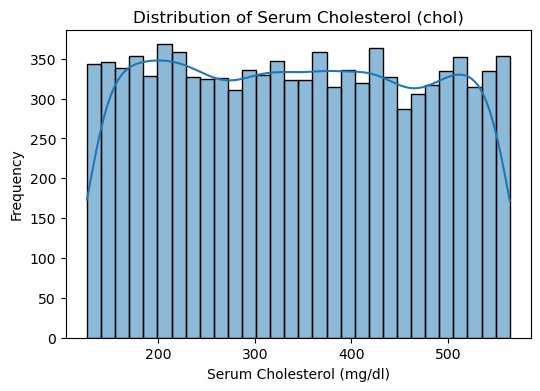

In [11]:
# checking Serum Cholesterol (chol) distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['chol'], kde=True, bins=30)
plt.title('Distribution of Serum Cholesterol (chol)')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()


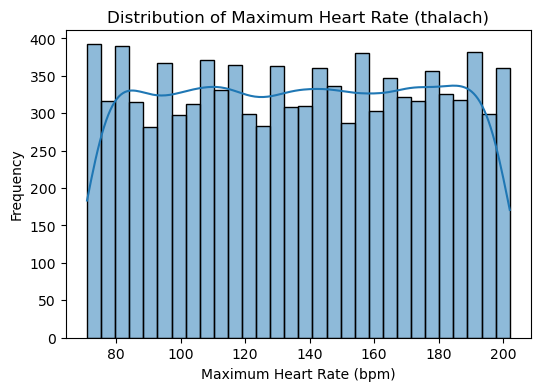

In [13]:
# checking Maximum Heart Rate (thalach) distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['thalach'], kde=True, bins=30)
plt.title('Distribution of Maximum Heart Rate (thalach)')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()


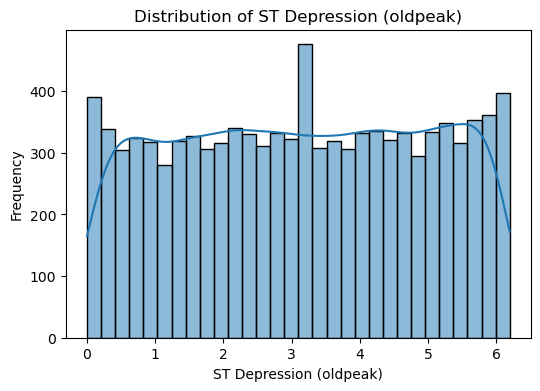

In [14]:
# checking ST Depression (oldpeak) distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['oldpeak'], kde=True, bins=30)
plt.title('Distribution of ST Depression (oldpeak)')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Frequency')
plt.show()


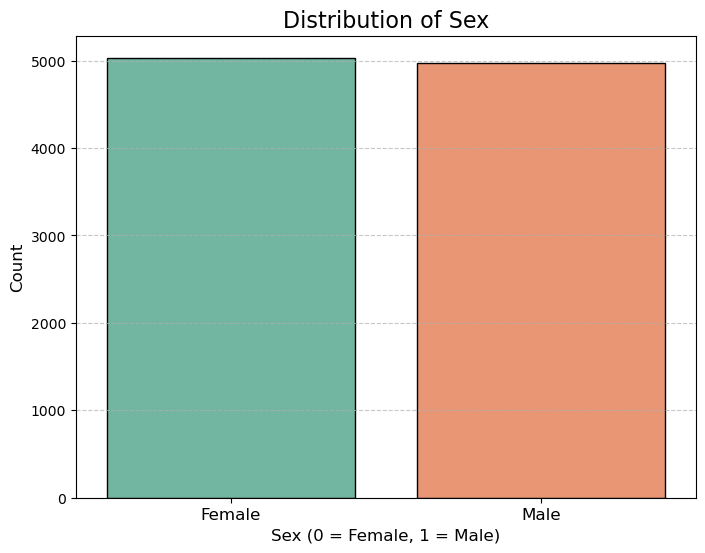

In [17]:
# Sex Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='Set2', edgecolor='black')
plt.title('Distribution of Sex', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


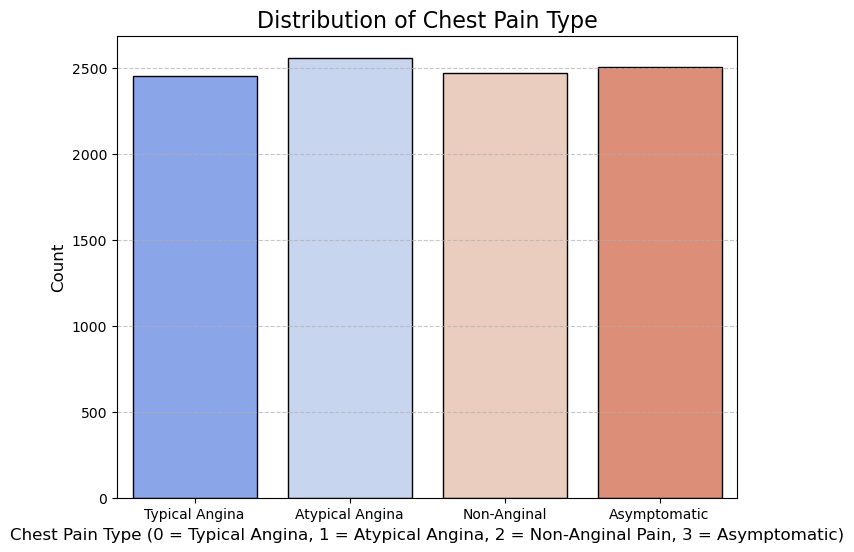

In [18]:
# Chest Pain Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df, palette='coolwarm', edgecolor='black')
plt.title('Distribution of Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


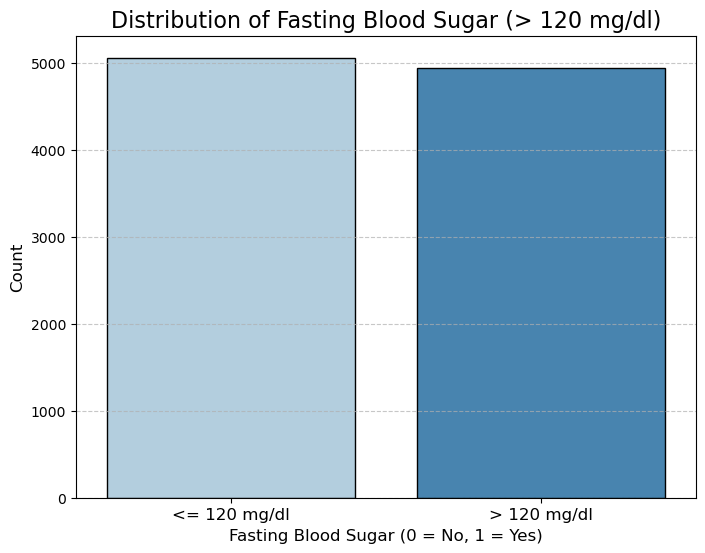

In [19]:
# Fasting Blood Sugar (> 120 mg/dl distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', data=df, palette='Blues', edgecolor='black')
plt.title('Distribution of Fasting Blood Sugar (> 120 mg/dl)', fontsize=16)
plt.xlabel('Fasting Blood Sugar (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['<= 120 mg/dl', '> 120 mg/dl'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


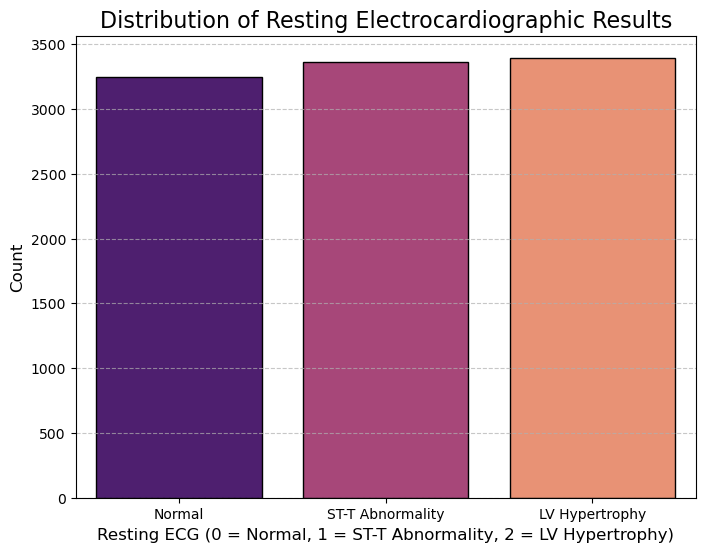

In [20]:
# Resting Electrocardiographic Results Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', data=df, palette='magma', edgecolor='black')
plt.title('Distribution of Resting Electrocardiographic Results', fontsize=16)
plt.xlabel('Resting ECG (0 = Normal, 1 = ST-T Abnormality, 2 = LV Hypertrophy)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['Normal', 'ST-T Abnormality', 'LV Hypertrophy'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


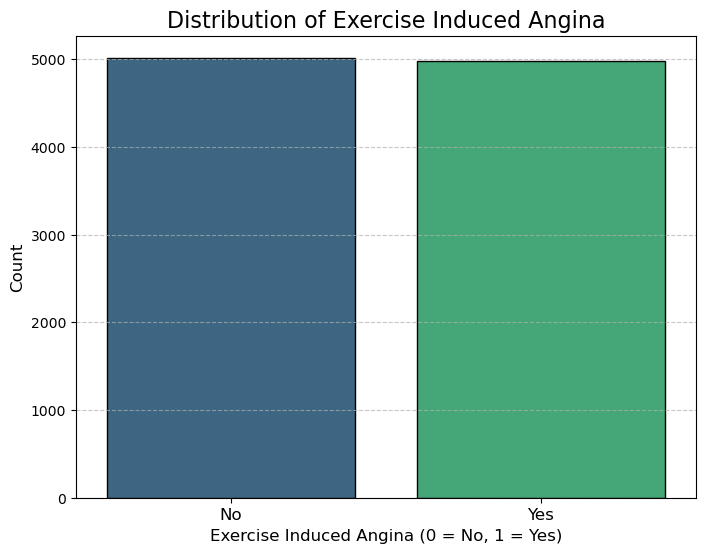

In [21]:
# Exercise Induced Angina Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', data=df, palette='viridis', edgecolor='black')
plt.title('Distribution of Exercise Induced Angina', fontsize=16)
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


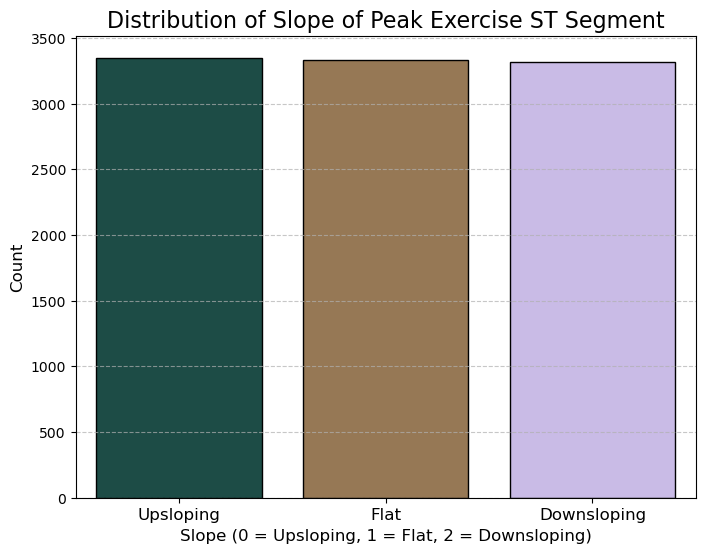

In [23]:
# Slope of Peak Exercise ST Segment Distribtuin
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', data=df, palette='cubehelix', edgecolor='black')
plt.title('Distribution of Slope of Peak Exercise ST Segment', fontsize=16)
plt.xlabel('Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


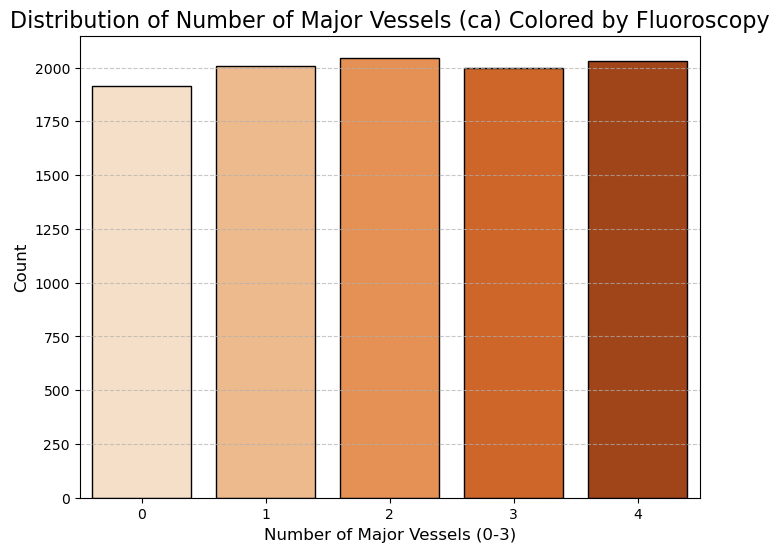

In [24]:
# Major Vessels (ca) Colored by Fluoroscopy Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', data=df, palette='Oranges', edgecolor='black')
plt.title('Distribution of Number of Major Vessels (ca) Colored by Fluoroscopy', fontsize=16)
plt.xlabel('Number of Major Vessels (0-3)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
df['thal'].value_counts()

1    2550
0    2491
2    2482
3    2477
Name: thal, dtype: int64

#### Heart Disease (Target)

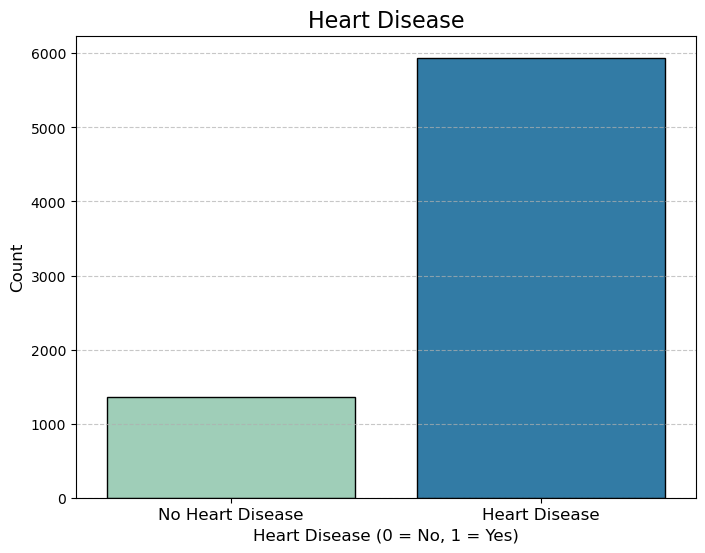

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='YlGnBu', edgecolor='black')
plt.title('Heart Disease', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Bivariate Exploratory Analysis

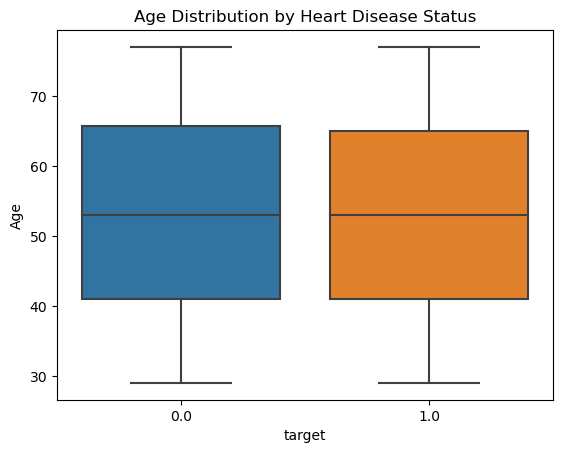

In [34]:
# Age Distribution by Heart Disease Status 
sns.boxplot(x='target', y='Age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.show()

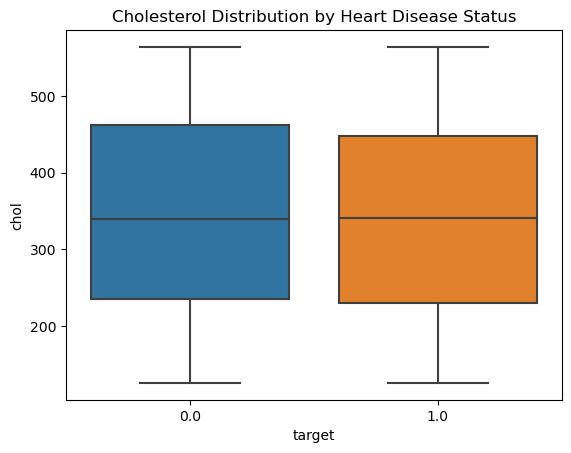

In [37]:
# Cholesterol Distribution by Heart Disease Status

sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()


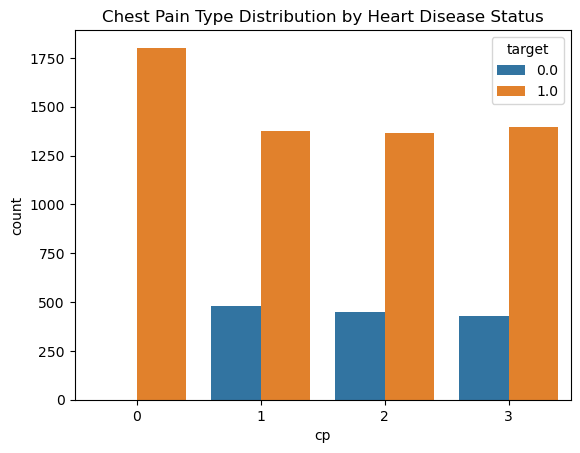

In [38]:
# Chest Pain Type by Heart Disease Status

sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type Distribution by Heart Disease Status')
plt.show()


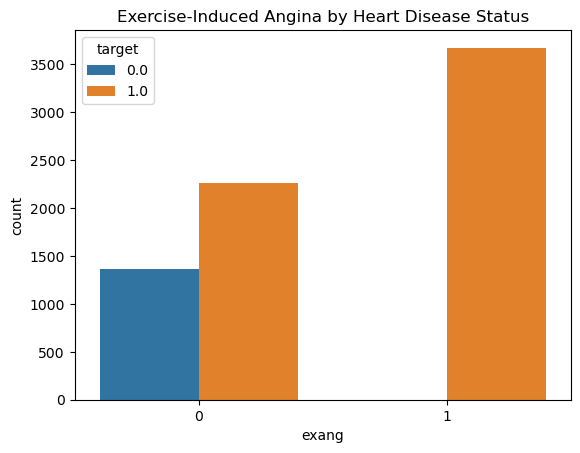

In [39]:
# Exercise-Induced Angina by Heart Disease Status
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina by Heart Disease Status')
plt.show()


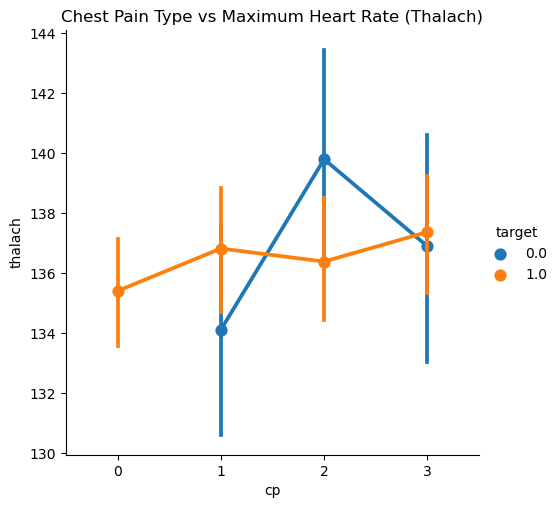

In [42]:
# Risk of Heart diesease as result of Chest Pain Type vs Maximum Heart Rate (Thalach)
sns.catplot(x='cp', y='thalach', hue='target', kind='point', data=df)
plt.title('Chest Pain Type vs Maximum Heart Rate (Thalach)')
plt.show()


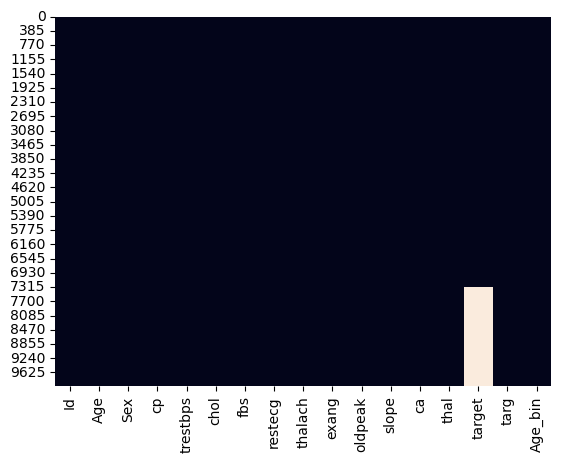

In [36]:
# Visualising any missing values in the dataframe
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Feature Engineering

In [7]:
# Define the categorical features for easy data manipulation and EDA
cat_cols = ['Sex', 'cp', 'fbs', 'exang', 'slope']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [8]:
# function to group the ages into bins
def age_group(x):
    if x < 30:
        return 'Young'
    elif 30 <= x < 40:
        return 'Adult'
    elif 40 <= x < 60:
        return 'Middle Age'
    else:
        return 'Old'

df['Age_bin'] = df['Age'].apply(age_group)

### Data Preprocessing

In [9]:
#label encoding the categorical columns
cat_cols.append('Age_bin')
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
# inspecting to know if they have been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        10000 non-null  int64  
 1   Age       10000 non-null  int64  
 2   Sex       10000 non-null  int32  
 3   cp        10000 non-null  int32  
 4   trestbps  10000 non-null  int64  
 5   chol      10000 non-null  int64  
 6   fbs       10000 non-null  int32  
 7   restecg   10000 non-null  int64  
 8   thalach   10000 non-null  int64  
 9   exang     10000 non-null  int32  
 10  oldpeak   10000 non-null  float64
 11  slope     10000 non-null  int32  
 12  ca        10000 non-null  int64  
 13  thal      10000 non-null  int64  
 14  target    7303 non-null   float64
 15  targ      10000 non-null  object 
 16  Age_bin   10000 non-null  int32  
dtypes: float64(2), int32(6), int64(8), object(1)
memory usage: 1.1+ MB


In [51]:
# splitting the data back to train and test and dropping the unnecessary columns
train_data = df[df["targ"] == "train"].drop(["targ", "Age", "Id" ], axis=1)
test_data = df[df["targ"] == "test"].drop(["targ", "target", "Age", "Id"], axis=1)

In [52]:
X = train_data.drop(columns=["target"])
X.head()

,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age_bin
0,0,1,0.60,0.18,1,0,0.63,0,1.50,1,4,1,0
1,1,2,0.98,0.06,0,1,0.25,0,0.80,2,1,0,1
2,1,2,0.07,0.17,1,0,0.64,0,2.10,1,3,1,0
3,0,0,0.18,0.41,1,2,0.13,1,4.90,0,2,2,2
4,1,2,0.42,0.67,1,1,0.73,1,0.90,2,4,0,0


In [53]:
y = train_data["target"]
print(y.value_counts())

1.00    5941
0.00    1362
Name: target, dtype: int64


In [54]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# viewing the shape of the X_train and X_test
X_train.shape, X_test.shape

((5842, 13), (1461, 13))

In [56]:
# viewing the shape of the y_train and y_test
y_train.shape, y_test.shape

((5842,), (1461,))

In [57]:
# resampling the data using SMOTE as it was found earlier that the target variable is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [58]:
# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
1.00    5941
0.00    1362
Name: target, dtype: int64

Class distribution after SMOTE:
1.00    4740
0.00    4740
Name: target, dtype: int64


## Model Building

In [60]:
# 5.2 Model Training with XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
# Gradient Boosting
gb_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, gb_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, gb_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.48      0.72      0.58       260
         1.0       0.93      0.83      0.88      1201

    accuracy                           0.81      1461
   macro avg       0.71      0.78      0.73      1461
weighted avg       0.85      0.81      0.83      1461



In [62]:
# RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)
rf_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, rf_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.45      0.39      0.42       260
         1.0       0.87      0.90      0.88      1201

    accuracy                           0.81      1461
   macro avg       0.66      0.64      0.65      1461
weighted avg       0.80      0.81      0.80      1461



In [63]:
# LightGBM
lgb_model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)
lgb_model.fit(X_resampled, y_resampled)
lgb_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, lgb_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910
Accuracy: 0.82
              precision    recall  f1-score   support

         0.0       0.51      0.52      0.51       260
         1.0       0.90      0.89      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.70      0.71      0.70      1461
weighted avg       0.83      0.82      0.83      1461



In [28]:
# Tuning the Random Forest Algorithm
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [100, 200, 300],
                  'max_depth': [None, 5, 10],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   random_state=42)

random_search.fit(X_resampled, y_resampled)
print(random_search.best_params_)
best_model = random_search.best_estimator_



{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}


In [44]:
from sklearn.metrics import accuracy_score

rf_oof_acc = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)
i = 1
for train_index, test_index in fold.split(X, y):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestClassifier(**random_search.best_params_)
    rf_model.fit(X_resampled, y_resampled)
    
    preds_rf = rf_model.predict(X_test)
    
    acc = accuracy_score(y_test, preds_rf)
    print(f"Fold {i} Accuracy: {acc:.4f}")
    
    rf_oof_acc.append(acc)
    

    print(f"Fold {i}: Done")
    i += 1

print(f"Mean Accuracy: {np.mean(rf_oof_acc):.4f}")

Fold 1 Accuracy: 0.8057
Fold 1: Done
Fold 2 Accuracy: 0.8263
Fold 2: Done
Fold 3 Accuracy: 0.7989
Fold 3: Done
Fold 4 Accuracy: 0.8082
Fold 4: Done
Fold 5 Accuracy: 0.8123
Fold 5: Done
Fold 6 Accuracy: 0.8041
Fold 6: Done
Fold 7 Accuracy: 0.8192
Fold 7: Done
Fold 8 Accuracy: 0.7877
Fold 8: Done
Fold 9 Accuracy: 0.8151
Fold 9: Done
Fold 10 Accuracy: 0.8123
Fold 10: Done
Mean Accuracy: 0.8090


In [ ]:
# Tuning the LightBoost Algorithm
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [100, 200, 300],
                  'max_depth': [None, 5, 10],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   random_state=42)

random_search.fit(X_resampled, y_resampled)
print(random_search.best_params_)
best_model = random_search.best_estimator_



In [ ]:
# For LightBoost
from sklearn.metrics import accuracy_score

lgb_oof_acc = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)
i = 1
for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = lgb.LGBMClassifier(**random_search.best_params_)
    rf_model.fit(X_train, y_train)
    
    preds_rf = rf_model.predict(X_test)
    
    acc = accuracy_score(y_test, preds_rf)
    print(f"Fold {i} Accuracy: {acc:.4f}")
    
    rf_oof_acc.append(acc)
    

    print(f"Fold {i}: Done")
    i += 1

print(f"Mean Accuracy: {np.mean(rf_oof_acc):.4f}")

In [19]:
# Checking Model Performance with Ensemble

meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(X_resampled, y_resampled)

ada_model = AdaBoostClassifier()
xgb_model = xgb.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100)

stacking_model = StackingClassifier(estimators=[("rf", rf_model), ("ada", ada_model), ("xgb", xgb_model)],
                                    final_estimator=meta_model,
    cv=5,  # Cross-validation to blend predictions from base models
    n_jobs=-1  # Use all available cores for parallel processing)
#cross_val_scores = cross_val_score(stacking_model, X_resampled, y_resampled, cv=10)


In [20]:
stacking_model.fit(X_resampled, y_resampled)
stack_pred = stacking_model.predict(X_test)
accuracy_score(y_test, stack_pred)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interact

In [72]:
test_pred = rf_model.predict(test_data)  #making predictions on the test data

In [73]:
submission.head() #checking the first five rows of the submission dataframe

,ID,Target
0,16501,1.00
1,10444,1.00
2,14288,1.00
3,10409,1.00
4,17330,0.00


In [74]:
# Create a submission DataFrame
submission = pd.read_csv("Sample Submission.csv")
submission = pd.DataFrame({
    'ID': submission['Id'], 
    'Target': test_pred
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission21.csv', index=False)

In [75]:
# Read the file again to confirm that the Target is not a float 
pred = pd.read_csv('submission21.csv')

In [76]:
pred.head()

,ID,Target
0,16501,1.00
1,10444,1.00
2,14288,1.00
3,10409,1.00
4,17330,0.00


In [77]:
pred['Target'] = pred['Target'].astype(int)

In [78]:
pred.to_csv('submission21.csv', index = False)

In [79]:
pred.head()

,ID,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
